<a href="https://colab.research.google.com/github/ElizabethWaithera/Machine_learning/blob/main/NSE_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIROBI STOCK EXCHANGE AI PREDICTOR

 ## 1. Market News:
 *We start by building a pipeline for accessing market news that contains valuable information that might affect stock movement of a given NSE company*
   
   

We will use news api, follow the link to get an API for free

*   https://newsapi.org/docs/endpoints/everything




In [ ]:
# Install the newsapi python library
!pip install newsapi-python
!pip install serpapi
!pip install yfinance
!pip install yahooquery

In [ ]:
from newsapi import NewsApiClient



In [ ]:
#We prompt the client to query about any NSE company

company = input("Please enter the name of the NSE company you would like to analyze: ")

Please enter the name of the NSE company you would like to analyze: Safaricom


In [ ]:
import os
os.environ["SERPAPI_API_KEY"] = "a526482aa918caee6ddcd520da46b953053a69509283d986b497cb9d3cb9b9ca"

In [ ]:
import requests
import yfinance as yf
from yahooquery import Ticker

def get_company_news(company_name):
    params = {
        "engine": "google",
        "tbm": "nws",
        "q": company_name,
        "api_key": os.environ["SERPAPI_API_KEY"],
    }

    response = requests.get('https://serpapi.com/search', params=params)
    data = response.json()

    return data.get('news_results')

In [ ]:
get_company_news(company_name)

[{'position': 1,
  'link': 'https://www.reuters.com/business/media-telecom/safaricoms-ethiopia-struggle-deters-potential-telecoms-investors-2023-12-19/',
  'title': "Safaricom's Ethiopia struggle deters potential telecoms investors",
  'source': 'Reuters',
  'date': '1 month ago',
  'snippet': "Foreign investor interest in Ethiopia's telecoms sector is cooling, sector \nexperts and those with knowledge of the licencing process say,...",
  'thumbnail': 'https://serpapi.com/searches/65c515772c6878f9f25dc5d6/images/c86f702a31167c71080ef9742f4b99814d9ee48b7bdb66585c9e46c072ca919e.jpeg'},
 {'position': 2,
  'link': 'https://itweb.africa/content/RgeVDvPRNyrMKJN3',
  'title': 'Safaricom reports significant M-PESA growth in Ethiopia',
  'source': 'ITWeb Africa',
  'date': '2 days ago',
  'snippet': "M-PESA has 26200 agents and 43100 merchants, according to the company's \nthird quarter 2023 update.",
  'thumbnail': 'https://serpapi.com/searches/65c515772c6878f9f25dc5d6/images/c86f702a31167c71d

In [ ]:
# Init
newsapi = NewsApiClient(api_key='b0de9201606a4e38b5c98a3b1ec70f5d')

# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q=company,
                                          category='business',
                                          language='en'
                                          )


In [ ]:
#No headlines found by the API
top_headlines

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [ ]:
# We now try to fetch everything using ".get_everything" function
all_articles = newsapi.get_everything(
    q=company,
    language='en',
    sort_by='relevancy',
    page=1
)

In [ ]:
# We now print all the articles found
all_articles

{'status': 'ok',
 'totalResults': 26,
 'articles': [{'source': {'id': None, 'name': 'AllAfrica - Top Africa News'},
   'author': None,
   'title': 'Kenya: M-Pesa Services Back After Experiencing Downtime',
   'description': "[Capital FM] Nairobi -- Safaricom's M-MPesa, the mobile phone-based money transfer service application is after over two hours of delay.",
   'url': 'https://allafrica.com/stories/202401090287.html',
   'urlToImage': 'https://cdn08.allafrica.com/static/images/structure/aa-logo-rgba-no-text-square.png',
   'publishedAt': '2024-01-09T12:42:22Z',
   'content': "Nairobi — Safaricom's M-MPesa, the mobile phone-based money transfer service application is after over two hours of delay.\r\nThe countrywide delay, which began on Tuesday around 11:00 am, was being ex… [+408 chars]"},
  {'source': {'id': 'newsweek', 'name': 'Newsweek'},
   'author': None,
   'title': 'The Magic Ingredient for African Expansion: Collaborative Partnerships',
   'description': 'By forming allianc

# Data preprocessing

We now clean the the data

We should extract `title`and `description` from the above JSON output into a well formatted text.


In [ ]:
formatted_articles = []

for article in all_articles['articles']:
  title = article['title']
  description = article['description']

  formatted_text = f"Title: {title} \n Description: {description}"

  formatted_articles.append(formatted_text)


for article_text in formatted_articles:
  print(article_text)






Title: Kenya: M-Pesa Services Back After Experiencing Downtime 
 Description: [Capital FM] Nairobi -- Safaricom's M-MPesa, the mobile phone-based money transfer service application is after over two hours of delay.
Title: The Magic Ingredient for African Expansion: Collaborative Partnerships 
 Description: By forming alliances with universities, HR leaders, and companies, businesses can build and sustain success in Africa.
Title: AI ads are sweeping across Africa 
 Description: The News NAIROBI — African companies from Nairobi to Lagos are in a race to use artificial intelligence to cut their marketing and advertising budgets ahead of a difficult 2024 due to economic difficulties, fueling panic over potential job losses. Businesses …
Title: The Magic Ingredient for African Expansion: Collaborative Partnerships 
 Description: The secret to success in Africa's growing business world is working with others. This market is full of opportunities, where businesses can thrive by collaborating

In [ ]:
!pip install nltk

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


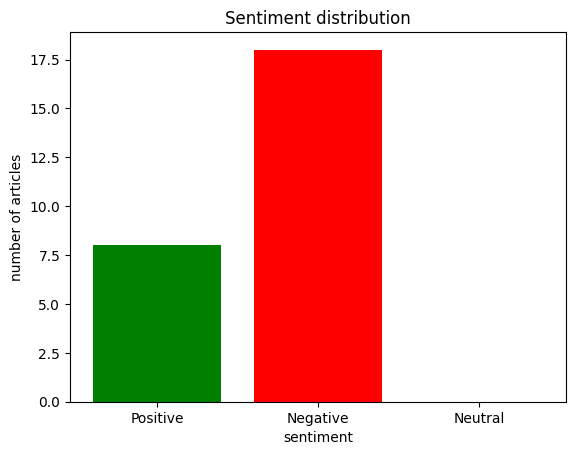

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

#Download the vader extension
nltk.download('vader_lexicon')

#create a sentiment analyzer object
SIA = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
  sentiment_score = SIA.polarity_scores(text)['compound']
  if sentiment_score >= 0.5:
    return 'Positive'
  elif sentiment_score <= 0.5:
    return 'Negative'
  else:
    return 'Neutral'


sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral':0}

for article_text in formatted_articles:
  sentiment = analyze_sentiment(article_text)
  sentiment_counts[sentiment] += 1

#create a bar chart to observe the sentiments
labels = list(sentiment_counts.keys())
values = list(sentiment_counts.values())

#create the bar chart
plt.bar(labels, values, color=['green', 'red', 'grey'])
plt.title('Sentiment distribution')
plt.xlabel('sentiment')
plt.ylabel('number of articles')
plt.show()




In [ ]:
import requests

url = "https://nairobi-stock-exchange-nse.p.rapidapi.com/stocks/NCBA"

headers = {
    "X-RapidAPI-Key": "0cf13a36c4msh495157ed96c1abbp15b7e6jsn96f46df4a28a",
    "X-RapidAPI-Host": "nairobi-stock-exchange-nse.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

[{'ticker': 'NCBA', 'name': 'NCBA Group Plc', 'volume': '8,300', 'price': '38.50', 'change': '-0.05'}]
